In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install nltk

### Step 1: Read JSON Files

In [3]:
import json

def read_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

# Replace 'file1.json' and 'file2.json' with your actual file paths
dataset1 = read_json_file('/content/drive/MyDrive/Model/github_data.json')
dataset2 = read_json_file('/content/drive/MyDrive/Model/openai_api_data.json')


### Step 2: Tokenization

In [4]:
import nltk
nltk.download('punkt')

def tokenize_text(text):
    return nltk.word_tokenize(text)

# Tokenize each answer in the datasets
tokenized_answers1 = [tokenize_text(entry['Answer']) for entry in dataset1]
tokenized_answers2 = [tokenize_text(entry['Answer']) for entry in dataset2]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Step 3: N-gram Precision

In [5]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_ngram_precision(reference, candidate):
    smoothie = SmoothingFunction().method4
    return sentence_bleu([reference], candidate, smoothing_function=smoothie)

# Calculate n-gram precision for each pair of answers
ngram_precisions = [calculate_ngram_precision(ref, cand) for ref, cand in zip(tokenized_answers1, tokenized_answers2)]


### Step 4: Brevity Penalty

In [6]:
def calculate_brevity_penalty(reference_lengths, candidate_length):
    brevity_penalty = min(1, len(reference_lengths) / candidate_length)
    return brevity_penalty

# Calculate brevity penalty
brevity_penalty = calculate_brevity_penalty([len(ref) for ref in tokenized_answers1], len(tokenized_answers2))


### Step 5: BLEU Score Calculation

In [7]:
def calculate_bleu_score(ngram_precisions, brevity_penalty):
    weights = [1.0 / len(ngram_precisions)] * len(ngram_precisions)
    weighted_geometric_mean = 0

    for precision, weight in zip(ngram_precisions, weights):
        weighted_geometric_mean += weight * (precision or 1e-10) ** (1 / len(ngram_precisions))

    bleu_score = brevity_penalty * weighted_geometric_mean
    return bleu_score

# Calculate BLEU score
bleu_score = calculate_bleu_score(ngram_precisions, brevity_penalty)
print(f"BLEU Score: {bleu_score}")


BLEU Score: 0.9395098172885602


In [8]:
import matplotlib.pyplot as plt

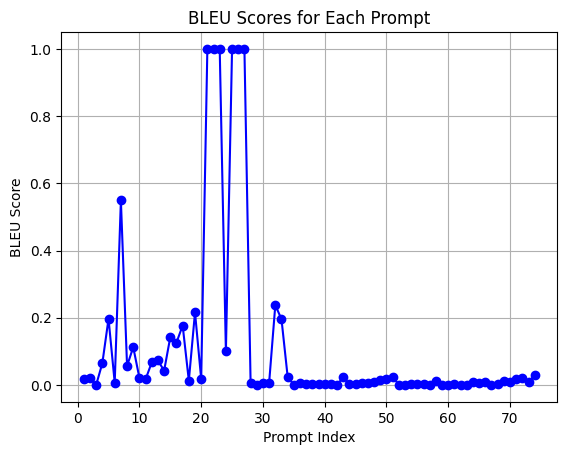

In [9]:
# Plotting the BLEU scores
plt.plot(range(1, len(ngram_precisions) + 1), ngram_precisions, marker='o', linestyle='-', color='b')
plt.xlabel('Prompt Index')
plt.ylabel('BLEU Score')
plt.title('BLEU Scores for Each Prompt')
plt.grid(True)
plt.show()

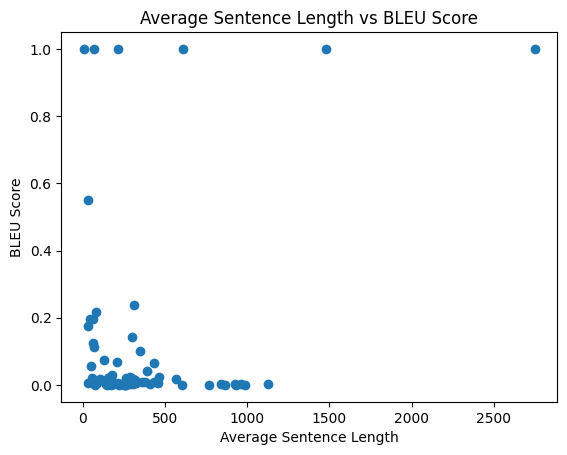

In [13]:
# Calculate sentence lengths
sentence_lengths1 = [len(sentence) for sentence in tokenized_answers1]
sentence_lengths2 = [len(sentence) for sentence in tokenized_answers2]

# Average sentence length
avg_sentence_lengths = [(l1 + l2) / 2 for l1, l2 in zip(sentence_lengths1, sentence_lengths2)]

# Plotting sentence length against BLEU score
plt.scatter(avg_sentence_lengths, ngram_precisions)
plt.title('Average Sentence Length vs BLEU Score')
plt.xlabel('Average Sentence Length')
plt.ylabel('BLEU Score')
plt.show()


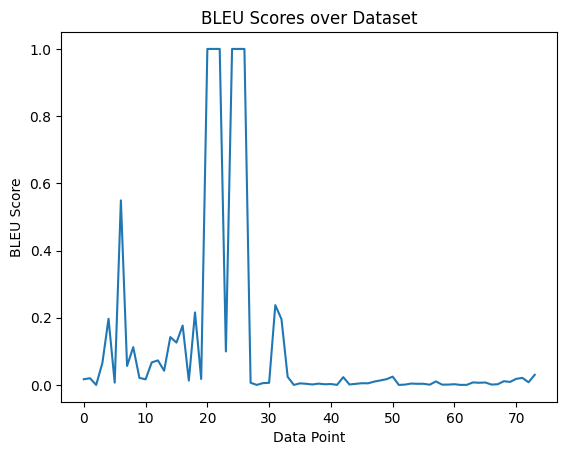

In [14]:
plt.plot(ngram_precisions)
plt.title('BLEU Scores over Dataset')
plt.xlabel('Data Point')
plt.ylabel('BLEU Score')
plt.show()
